In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.font_manager import fontManager, FontProperties
import ptitprince as pt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
import pingouin as pg
import statsmodels.api as sm
import language_tool_python as ltp
from PIL import Image
%matplotlib notebook
%matplotlib inline

def get_img(name):
    path = "font/emojis/{}.png".format(name)

    if name == 'Human':
        img = plt.imread(path)
    else:
        img = np.asarray(Image.open(path).resize((136, 128)))

    #  im = plt.imread(img)

    return img

def offset_image(coord, name, ax, size=0.5):
    img = get_img(name)
    im = OffsetImage(img, zoom=size)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -21.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)

def raincloud(x, y, markersize, df, order=None, hue=None):
    # adding color
    pal = sns.color_palette()
    if df is not None:
        means = df.groupby([x])[y].mean().reindex(order)
    else:
        if len(order) > 2:
            raise Exception('Too many unique x values for this custom plot')

        mean_1 = np.mean([i[0] for i in zip(y, x) if i[1] == order[0]])
        mean_2 = np.mean([i[0] for i in zip(y, x) if i[1] == order[1]])
        means = [mean_1, mean_2]

    dodge = None
    if hue:
        means = df.groupby([x, hue])[y].mean().reindex(order)
        dodge = True
        
    sns.scatterplot(
        x=means.index,
        y=means,
        color='white',
        edgecolor='black',
        s=150/2, linewidth=1.5, zorder=4)

    ax = pt.half_violinplot(x=x, y=y, data=df, palette=pal, bw=.25, cut=0., linewidth=0,
                            scale="area", width=.7, inner=None, orient='v', zorder=1, order=order, hue=hue, dodge=dodge)
    # pt.RainCloud(x=x, y=y, data=df, palette=pal, bw=.25, width_viol=.6, orient='v', zorder=2, order=order, hue=hue, dodge=dodge)

    ax = sns.stripplot(x=x, y=y, data=df, palette=pal, edgecolor="white",  linewidth=1, order=order,
                       size=markersize, orient='v', zorder=2, jitter=1, alpha=0.6, hue=hue, dodge=dodge)

    ax2 = sns.pointplot(x=x, y=y, data=df, color='black',  join=False, errorbar='se', linewidth=.8,
     edgecolor='black', capsize=.08, zorder=3, order=order, hue=hue, dodge=dodge)
    
df = pd.read_csv('df.csv')

/tmp/ipykernel_31867/2783248288.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_31867/2783248288.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = df[df.engine==engine].groupby(['prolific_id', 'answer'], as_index=False).mean()
/tmp/ipykernel_31867/2783248288.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = df[df.engine==engine].groupby(['prolific_id', 'answer'], as_index=False).mean()
/tmp/ipykernel_31867/2783248288.py:26: FutureWarn

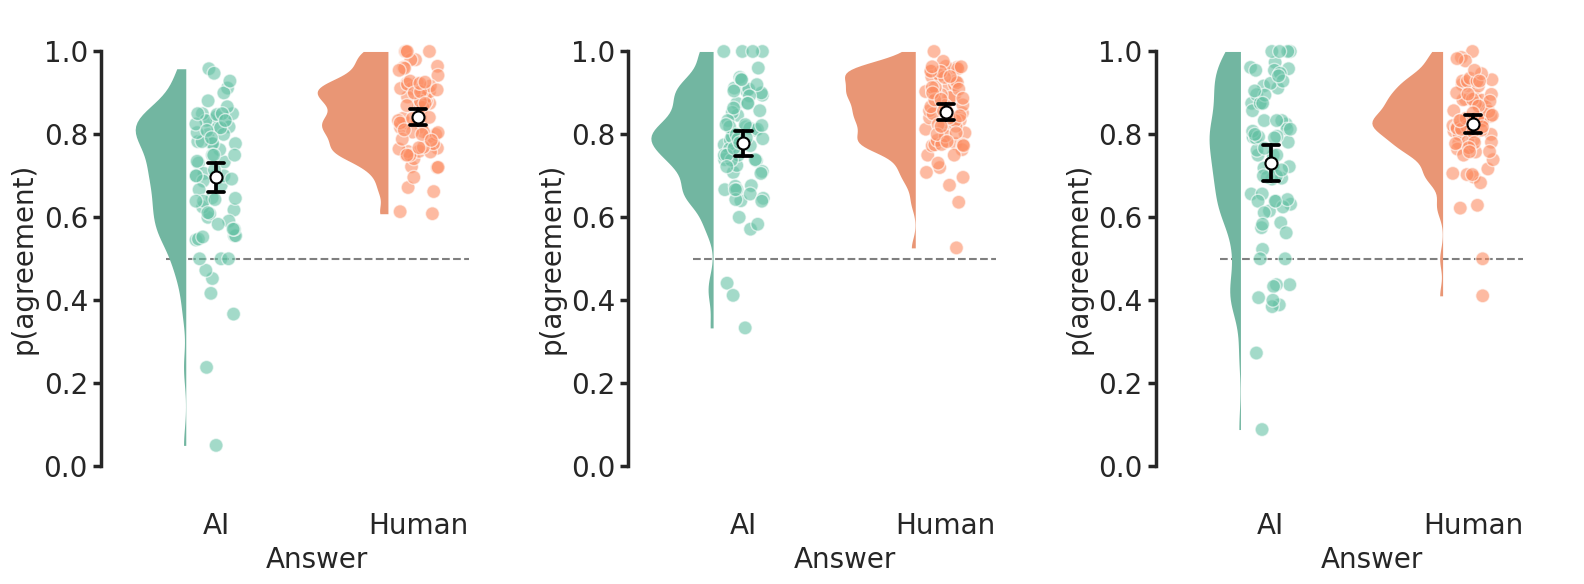

In [20]:
sns.set(
    rc={'figure.figsize':(16,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('Set2')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

count = 0
for engine in ('dv2', 'dv3', 'dv2_humanized'):
    count += 1
    plt.subplot(1, 3, count)
# -------------------------------------------------------------------------------
# Plot 1: Turing Test 
# -------------------------------------------------------------------------------
    avg = df[df.engine==engine].groupby(['prolific_id', 'answer'], as_index=False).mean()
    plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5, zorder=-5)
    raincloud(x='answer', y='agree', markersize=10, df=avg)
    plt.ylim(0, 1)
    plt.ylim(-.1, 1.1)
    plt.xticks(range(2), ('AI', 'Human'))
    plt.xlabel('Answer')
    plt.ylabel('p(agreement)')
# plt.title('Agreement (yes/no)')
    sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
    plt.tick_params(axis='x', which='both', length=0)

    plt.tight_layout()
# plt.suptitle(engine, fontsize=30, y=1.3)
plt.savefig('figs/fig2.svg', dpi=300, bbox_inches='tight')

/tmp/ipykernel_47145/3620674059.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_47145/3620674059.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = df.groupby(['engine','prolific_id'], as_index=False).mean()


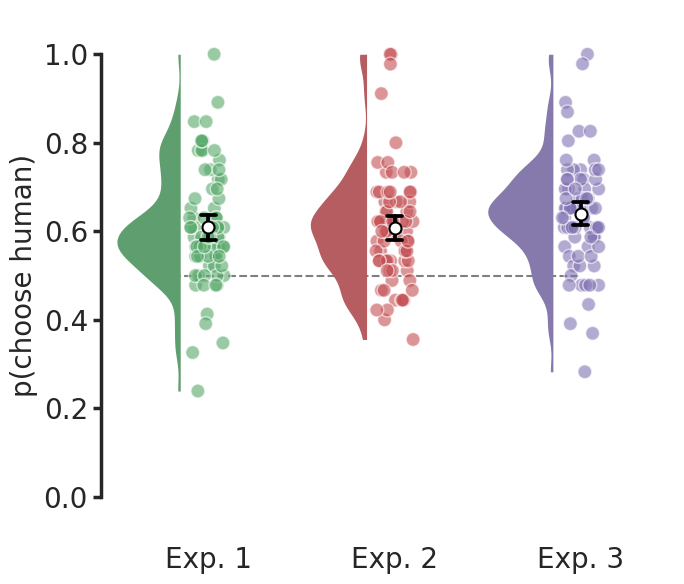

In [28]:
sns.set(
    rc={'figure.figsize':(7,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# get deep palette
palette = sns.color_palette('deep')
sns.set_palette(palette[2:])
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


order = ['dv2', 'dv3', 'dv2_humanized']
# -------------------------------------------------------------------------------
# Plot 1: Turing Test 
# -------------------------------------------------------------------------------
avg = df.groupby(['engine','prolific_id'], as_index=False).mean()
plt.plot([-0.25, 2], [0.5, 0.5], '--', color='black', alpha=0.5, zorder=-5)
raincloud(x='engine', y='p_human', markersize=10, df=avg, order=order)
# plt.ylim(-.1, 1.1)
plt.ylim(.19, 1.1)
# plt.xticks(range(2), ('AI', 'Human'))
plt.xticks(range(3), ('Exp. 1', 'Exp. 2', 'Exp. 3'))
plt.xlabel('')
plt.ylabel('p(choose human)')
plt.ylim(-.1, 1.1)
# plt.title('Agreement (yes/no)')
sns.despine(offset=10, trim=True, bottom=True);
# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)

plt.tight_layout()
# plt.suptitle(engine, fontsize=30, y=1.3)
plt.savefig('figs/fig3_1.svg', dpi=300, bbox_inches='tight')

/tmp/ipykernel_47145/3332646680.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_47145/3332646680.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = df.groupby(['engine','prolific_id'], as_index=False).mean()


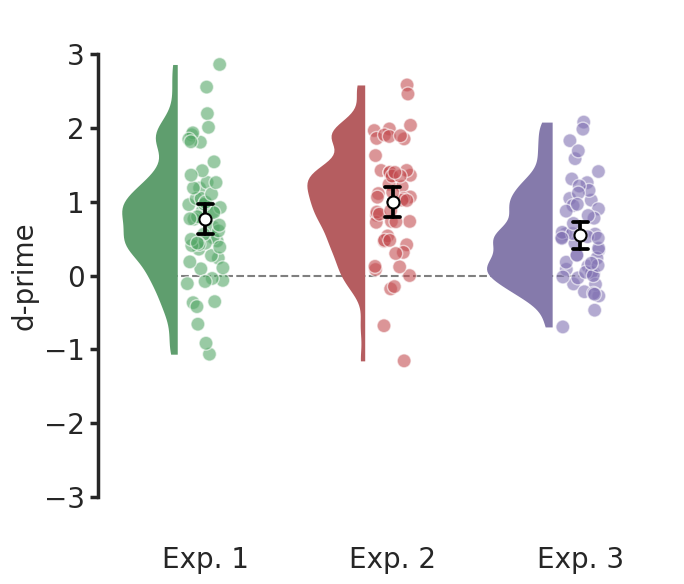

In [29]:
sns.set(
    rc={'figure.figsize':(7,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
palette = sns.color_palette('deep')
sns.set_palette(palette[2:])

sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

order = ['dv2', 'dv3', 'dv2_humanized']

# -------------------------------------------------------------------------------
# Plot 1: Turing Test 
# -------------------------------------------------------------------------------
avg = df.groupby(['engine','prolific_id'], as_index=False).mean()
plt.plot([-0.25, 2], [0, 0], '--', color='black', alpha=0.5, zorder=-5)
raincloud(x='engine', y='d_prime', markersize=10, df=avg, order=order)
plt.ylim(0, 1)
plt.ylim(-3.6, 3.6)
# plt.xticks(range(2), ('AI', 'Human'))
# plt.yticks([-1.5,  0, 1, 2, 3])
plt.xticks(range(3), ('Exp. 1', 'Exp. 2', 'Exp. 3'))
plt.xlabel('')
plt.ylabel('d-prime')
# plt.title('Agreement (yes/no)')
sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)

plt.tight_layout()
# plt.suptitle(engine, fontsize=30, y=1.3)
plt.savefig('figs/fig3_2.svg', dpi=300, bbox_inches='tight')

/tmp/ipykernel_47145/1412941238.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_47145/1412941238.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d1 = df.groupby(['engine', 'prolific_id', 'source'], as_index=False).mean()
/tmp/ipykernel_47145/1412941238.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d2 = df.groupby(['engine', 'prolific_id', 'answer'], as_index=False).mean()


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.033087,151,two-sided,7.383958e-16,"[0.11, 0.17]",0.73268,8.078e+12,1.0


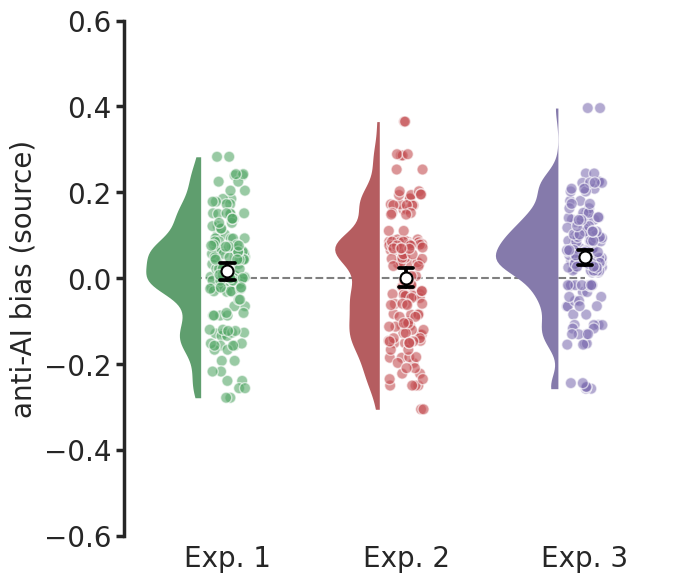

In [33]:
sns.set(
    rc={'figure.figsize':(7,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
palette = sns.color_palette('deep')
sns.set_palette(palette[2:])

sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

# compute anti AI bias 
d1 = df.groupby(['engine', 'prolific_id', 'source'], as_index=False).mean()
d2 = df.groupby(['engine', 'prolific_id', 'answer'], as_index=False).mean()

# compute
for id in df.prolific_id.unique():
    d1.loc[d1.prolific_id==id, 'bias_source'] = \
        d1[(d1.source=='Human') & (d1.prolific_id==id)].agree.values[0]\
        - d1[(d1.source=='AI') & (d1.prolific_id==id)].agree.values[0]
    try:
        d2.loc[d2.prolific_id==id, 'bias_answer'] =\
            d2[(d2.answer=='Human') & (d2.prolific_id==id)].agree.values[0]\
            - d2[(d2.answer=='AI') & (d2.prolific_id==id)].agree.values[0]
    except:
        continue
    
plt.plot([-0.25, 2], [0, 0], '--', color='black', alpha=0.5, zorder=-5)
raincloud(x='engine', y='bias_source',  markersize=8, df=d1, order=['dv2', 'dv3', 'dv2_humanized'])
# raincloud(x='engine', y='bias_answer',  markersize=8, df=d2, order=['dv2', 'dv3', 'dv2_humanized'])

plt.xticks(range(3), ('Exp. 1', 'Exp. 2', 'Exp. 3'))
plt.xlabel('')
plt.ylim(-.61, .61)

plt.ylabel('anti-AI bias (source)')

sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)

plt.tight_layout()
# plt.suptitle(engine, fontsize=30, y=1.3)
plt.savefig('figs/fig3_3.svg', dpi=300, bbox_inches='tight')
pg.ttest(d2[d2.engine=='dv2'].bias_answer, 0)

/tmp/ipykernel_47145/2408801978.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_47145/2408801978.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d1 = df.groupby(['engine', 'prolific_id', 'source'], as_index=False).mean()
/tmp/ipykernel_47145/2408801978.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d2 = df.groupby(['engine', 'prolific_id', 'answer'], as_index=False).mean()


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.033087,151,two-sided,7.383958e-16,"[0.11, 0.17]",0.73268,8.078e+12,1.0


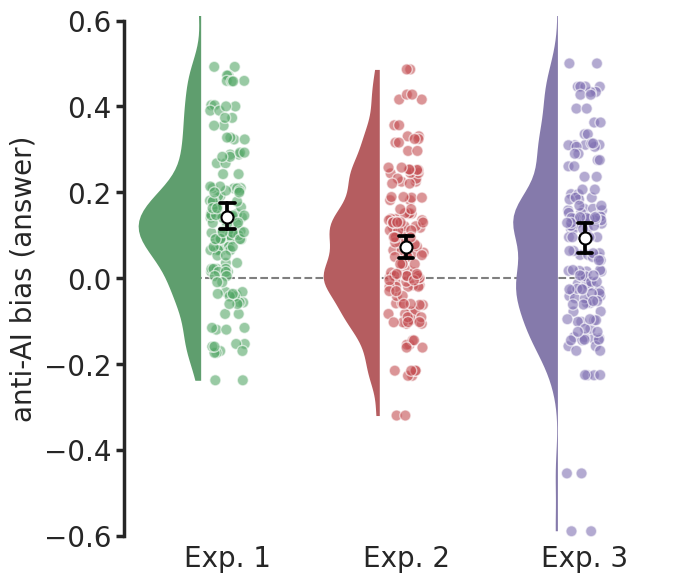

In [34]:
sns.set(
    rc={'figure.figsize':(7,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
palette = sns.color_palette('deep')
sns.set_palette(palette[2:])

sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

# compute anti AI bias 
d1 = df.groupby(['engine', 'prolific_id', 'source'], as_index=False).mean()
d2 = df.groupby(['engine', 'prolific_id', 'answer'], as_index=False).mean()

# compute
for id in df.prolific_id.unique():
    d1.loc[d1.prolific_id==id, 'bias_source'] = \
        d1[(d1.source=='Human') & (d1.prolific_id==id)].agree.values[0]\
        - d1[(d1.source=='AI') & (d1.prolific_id==id)].agree.values[0]
    try:
        d2.loc[d2.prolific_id==id, 'bias_answer'] =\
            d2[(d2.answer=='Human') & (d2.prolific_id==id)].agree.values[0]\
            - d2[(d2.answer=='AI') & (d2.prolific_id==id)].agree.values[0]
    except:
        continue
    
plt.plot([-0.25, 2], [0, 0], '--', color='black', alpha=0.5, zorder=-5)
# raincloud(x='engine', y='bias_source',  markersize=8, df=d1, order=['dv2', 'dv3', 'dv2_humanized'])
raincloud(x='engine', y='bias_answer',  markersize=8, df=d2, order=['dv2', 'dv3', 'dv2_humanized'])

plt.xticks(range(3), ('Exp. 1', 'Exp. 2', 'Exp. 3'))
plt.xlabel('')
plt.ylim(-.61, .61)

plt.ylabel('anti-AI bias (answer)')

sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)

plt.tight_layout()
# plt.suptitle(engine, fontsize=30, y=1.3)
plt.savefig('figs/fig3_4.svg', dpi=300, bbox_inches='tight')
pg.ttest(d2[d2.engine=='dv2'].bias_answer, 0)

/tmp/ipykernel_47145/1557360648.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_47145/1557360648.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = df.groupby(['engine','prolific_id'], as_index=False).mean()


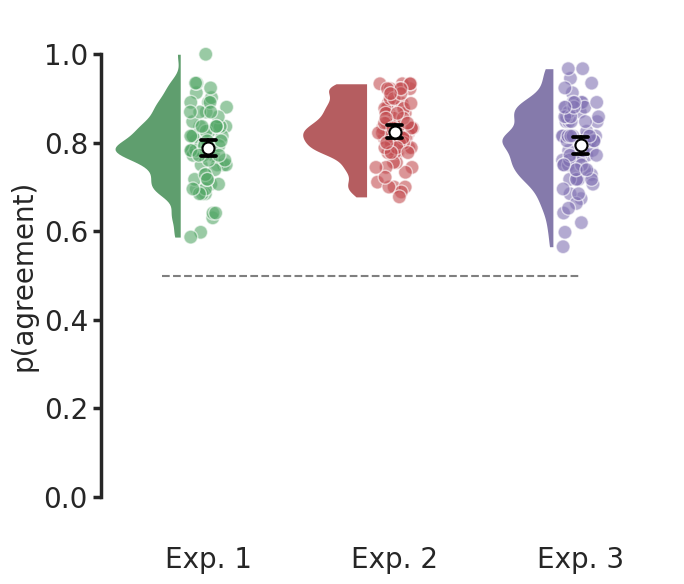

In [39]:
sns.set(
    rc={'figure.figsize':(7,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
palette = sns.color_palette('deep')
sns.set_palette(palette[2:])

sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

order = ['dv2', 'dv3', 'dv2_humanized']

# -------------------------------------------------------------------------------
# Plot 1: Turing Test 
# -------------------------------------------------------------------------------
avg = df.groupby(['engine','prolific_id'], as_index=False).mean()
plt.plot([-0.25, 2], [0.5, 0.5], '--', color='black', alpha=0.5, zorder=-5)
raincloud(x='engine', y='agree', markersize=10, df=avg, order=order)
plt.ylim(-.1, 1.1)
plt.ylabel('p(agreement)')
# plt.ylim(-3.6, 3.6)
# plt.xticks(range(2), ('AI', 'Human'))
# plt.yticks([-1.5,  0, 1, 2, 3])
plt.xticks(range(3), ('Exp. 1', 'Exp. 2', 'Exp. 3'))
plt.xlabel('')
# plt.title('Agreement (yes/no)')
sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)

plt.tight_layout()
# plt.suptitle(engine, fontsize=30, y=1.3)
plt.savefig('figs/fig3_5.svg', dpi=300, bbox_inches='tight')

In [3]:
d = df.groupby(['engine', 'prolific_id', 'source'], as_index=False).mean()

pg.pairwise_tests(dv='agree', within='source', between='engine', subject='prolific_id', data=d, padjust='bonf', within_first=False)

/tmp/ipykernel_47145/3938748906.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = df.groupby(['engine', 'prolific_id', 'source'], as_index=False).mean()
/home/getz/CodeProjects/CognitiveReflection/venv/lib/python3.11/site-packages/pingouin/pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()


,Contrast,engine,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,engine,-,dv2,dv2_humanized,False,True,-0.492241,153.913065,two-sided,0.623250,1.000000,bonf,0.193,-0.078394
1,engine,-,dv2,dv3,False,True,-3.367337,146.467504,two-sided,0.000970,0.002909,bonf,28.429,-0.541096
2,engine,-,dv2_humanized,dv3,False,True,-2.760354,147.213928,two-sided,0.006509,0.019526,bonf,5.49,-0.439313
3,source,-,AI,Human,True,True,-2.634131,231.000000,two-sided,0.009006,NaN,NaN,2.151,-0.216955
4,engine * source,dv2,AI,Human,True,True,-1.162439,76.000000,two-sided,0.248695,0.746084,bonf,0.24,-0.158095
5,engine * source,dv2_humanized,AI,Human,True,True,-3.669532,78.000000,two-sided,0.000443,0.001328,bonf,50.955,-0.466294
6,engine * source,dv3,AI,Human,True,True,-0.085596,75.000000,two-sided,0.932016,1.000000,bonf,0.127,-0.014313


Optimization terminated successfully.
         Current function value: 0.480724
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 agree1   No. Observations:                 3128
Model:                          Logit   Df Residuals:                     3126
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Jun 2023   Pseudo R-squ.:                0.003357
Time:                        16:15:40   Log-Likelihood:                -1503.7
converged:                       True   LL-Null:                       -1508.8
Covariance Type:            nonrobust   LLR p-value:                  0.001459
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6304      0.069     23.558      0.000       1.495       1.766
len           -0.0009      0.000     -3.259      0.001      -0.001      -0.000
==============================================================================
"""

Text(12.569444444444445, 0.5, 'p(agree)')

Text(0.5, 12.444444444444438, 'length of justification (characters)')

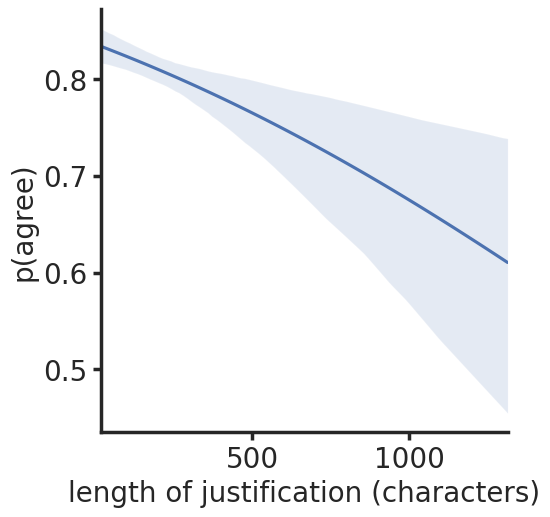

In [99]:
import statsmodels.formula.api as sm

# add length of a1 to df
df['len'] = df.a1.str.len().astype(int)

df['agree1'] = df.agree1.astype(int)
df['agree2'] = df.agree2.astype(int)
# set source AI as 0 and human as 1
df['source2'] = df.source.map({'AI':0, 'Human':1})

# df
# probability of agreeing (agree1) predicted by length of the answer
sm.logit('agree1 ~ len', data=df).fit().summary()
sns.lmplot(x='len', y='agree1', data=df, logistic=True, scatter=False)
plt.ylabel('p(agree)')
plt.xlabel('length of justification (characters)')
# plt.ylim(.75, .95)

# ADD CORRECTNESS SCORE

<AxesSubplot:xlabel='source', ylabel='errors'>

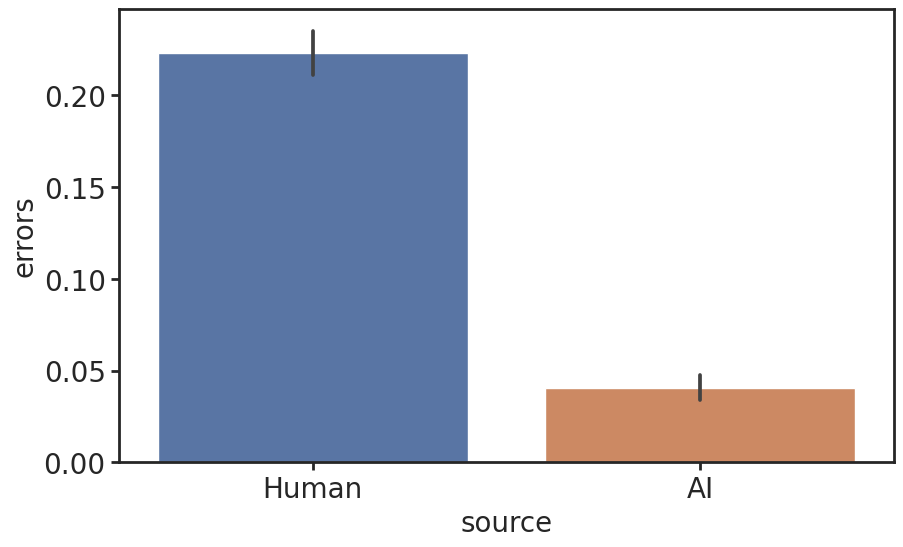

In [64]:
sns.barplot(x='source', y='errors', data=df, ci=68)

In [52]:
def rule(x):
   dic = ['HIV', 'Mrs', 'VCR', 'Monday', 'Santiago', 'Morris']
   err = []
   for m in tool.check(x):
         if m.category in ('TYPOS', 'GRAMMAR') and m.ruleId not in ('UPPERCASE_SENTENCE_START', 'I_LOWERCASE'):
            if any(el in m.replacements for el in dic): 
               continue
            err.append(m)
   return len(err)

# df = df[df.engine=='dv2_ai']
unique_a1 = df.a1.unique()
new_df = pd.DataFrame({'a1': unique_a1, 'errors': [None, ]*len(unique_a1)})
with ltp.LanguageTool('en-US', remote_server='http://localhost:8081') as tool:
    new_df['errors'] = new_df.a1.apply(rule)
print('Finished checking correctness, apply to dv2 and dv3')
df['errors'] = df.a1.apply(lambda x: new_df[new_df.a1==x].errors.values[0])
#dv3['correctness'] = dv3.a1.apply(lambda x: new_df[new_df.a1==x].correctness.values[0])
#dv2.to_csv('HUMANS/dv2_77.csv')
#dv3.to_csv('HUMANS/dv3_76.csv')
# df[df.engine=='dv2_humanized'].to_csv('dv2_humanized_correctness.csv')

Finished checking correctness, apply to dv2 and dv3


<AxesSubplot:xlabel='source', ylabel='correctness'>

Text(0, 0.5, 'Errors')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-9.8172,298,two-sided,0.0000,"[-0.17, -0.12]",1.1336,5.786e+16,1.0000


array([ 2,  3,  4,  5,  6,  8,  9, 11, 13, 12, 17, 19, 18, 16, 20, 21, 24,
       27, 30, 33, 42, 25, 32, 28, 43, 46, 54, 56, 58, 64, 50, 65,  1,  7,
       14, 15, 23, 22, 29, 26, 34, 35, 36, 38, 40, 44, 47, 49, 41, 52, 51,
       48, 57, 53, 59, 60, 61, 37, 39, 62, 45, 55, 63, 66, 67, 10, 69, 68,
       70, 71, 72, 31, 75, 73,  0, 76, 74])

,respondent_id,source,engine,dataset_id,id_first,item_idx,item_id,q_id,rt,correct,agree1,agree2,choseLeft,correctness
0,0,AI,dv2_ai,35.5263,0.6579,25.4474,1862.1316,2.0000,50383.9211,0.5000,0.7368,0.7632,0.6053,0.0000
1,0,Human,dv2_ai,37.1053,0.5526,24.9474,1815.1053,2.0000,43626.3947,0.5789,0.6842,0.7105,0.5000,0.4211
2,1,AI,dv2_ai,28.1892,0.5135,27.2973,1582.7027,2.0000,43011.6486,0.6486,0.7027,0.7297,0.4054,0.0811
3,1,Human,dv2_ai,37.1951,0.6341,21.2683,1709.3171,2.0000,32521.4390,0.6098,0.8537,0.8293,0.4634,0.3659
4,2,AI,dv2_ai,31.0541,0.5405,25.8378,1545.3514,2.0000,59214.1892,0.5946,0.7027,0.7297,0.5676,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,8.0,AI,dv3,37.0556,0.4815,22.6296,1758.3704,2.0000,136107.9815,0.5556,0.8519,0.7963,NaN,0.1481
296,9.0,AI,dv2,40.5593,0.5085,22.0678,1901.2542,2.0000,40610.0339,0.5932,0.7966,0.7627,NaN,0.0678
297,9.0,AI,dv2_humanized,41.1404,0.4737,23.2807,1940.0000,2.0000,36635.3158,0.3509,0.8246,0.7719,0.6491,0.2982
298,9.0,AI,dv2_prolific,41.1404,0.4211,21.9123,1940.0000,2.0000,45570.4211,0.4737,0.8246,0.7368,0.5088,0.0702


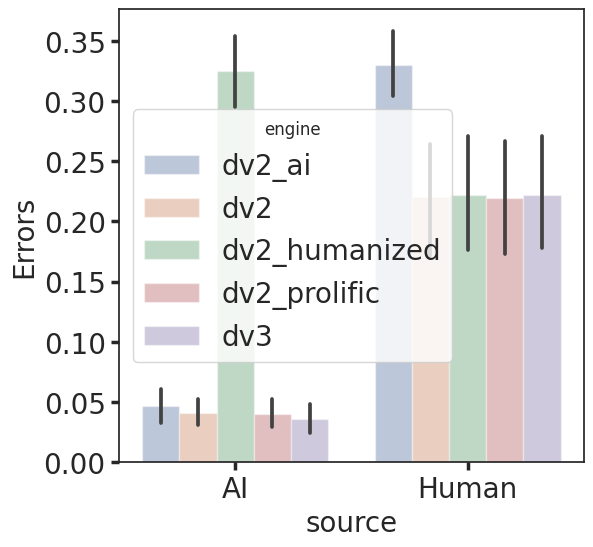

In [160]:
# df = pd.concat([dv2_ai, dv2_humanized], axis=0)
# df = dv2_humanized
# df.shape[0]/3
df2 = df[df.q_id==2].groupby(['respondent_id', 'source', 'engine'], as_index=False).mean()
sns.set({'figure.figsize': (6, 6)})
sns.set_style('ticks')
sns.barplot(x='source', y='correctness', hue='engine', data=df2, alpha=0.4)
# sns.stripplot(x='source', y='correctness', hue='engine', data=df, alpha=0.7, jitter=0.1, size=5, zorder=1)
plt.ylabel('Errors')
# plt.ylim(0, 6 )
pg.ttest(df2[df2.source=='AI'].correctness, df2[df2.source=='Human'].correctness, paired=False)
df.dataset_id.unique()
df2

,source,engine,dataset_id,id_first,item_idx,item_id,q_id,rt,choseLeft
0,AI,dv2,37.726655,0.490662,22.554612,1744.932654,1.0,41761.219015,NaN
1,AI,dv2_ai,17.585216,0.484600,23.724846,1818.478439,1.0,52978.870637,0.498289
2,AI,dv2_humanized,38.231031,0.496602,22.727633,1804.070215,1.0,39429.835787,0.498112
3,AI,dv2_prolific,37.301657,0.495580,22.440884,1760.807735,1.0,41863.607182,0.488398
4,AI,dv3,37.102238,0.523896,22.032668,1759.416818,1.0,44050.851785,NaN
5,Human,dv2,37.225352,0.490141,22.445634,1722.030423,1.0,39315.578028,NaN
6,Human,dv2_ai,18.111562,0.529412,24.271805,1804.647059,1.0,44640.208925,0.521974
7,Human,dv2_humanized,37.770270,0.497748,22.273649,1781.603604,1.0,39853.650338,0.510886
8,Human,dv2_prolific,36.776316,0.513706,22.558662,1735.283991,1.0,37703.255482,0.498721
9,Human,dv3,37.872100,0.499151,21.969440,1795.735144,1.0,38326.691002,NaN


array([True, False], dtype=object)

/tmp/ipykernel_1408535/1206905378.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


<AxesSubplot:xlabel='engine', ylabel='d_prime'>

<AxesSubplot:xlabel='engine', ylabel='d_prime'>

Text(0.5, 0, 'exp')

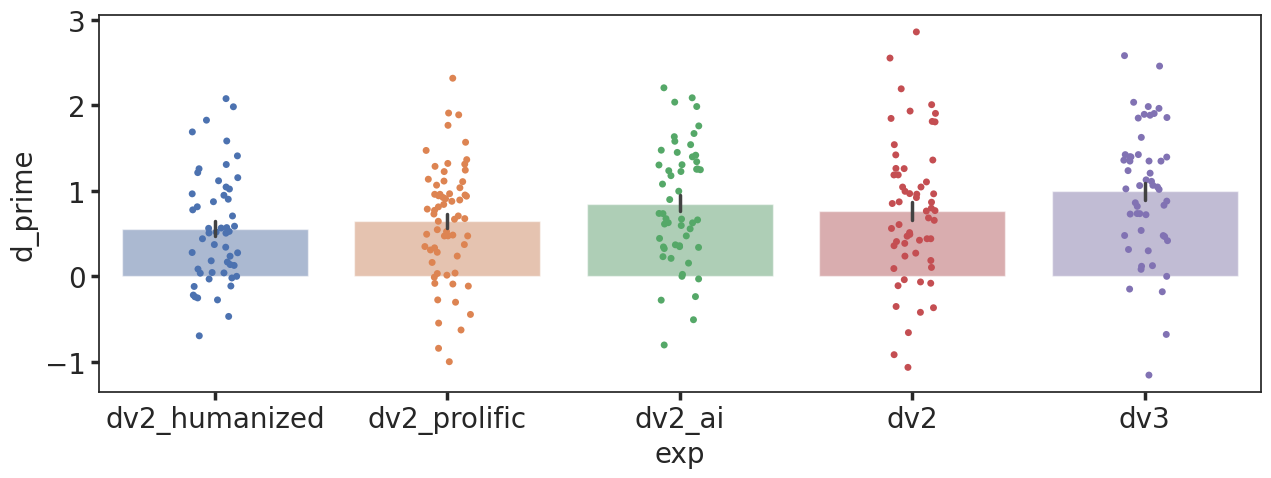

<AxesSubplot:>

(-3.0, 3.0)

Text(0.5, 1.0, 'Agreement (Yes/No)')

           n       r          CI95%  p-val   BF10  power
pearson  280 -0.0106  [-0.13, 0.11] 0.8596  0.076 0.0535
                            OLS Regression Results                            
Dep. Variable:                 agree1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.03133
Date:                Wed, 14 Jun 2023   Prob (F-statistic):              0.860
Time:                        16:32:44   Log-Likelihood:                 212.56
No. Observations:                 280   AIC:                            -421.1
Df Residuals:                     278   BIC:                            -413.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

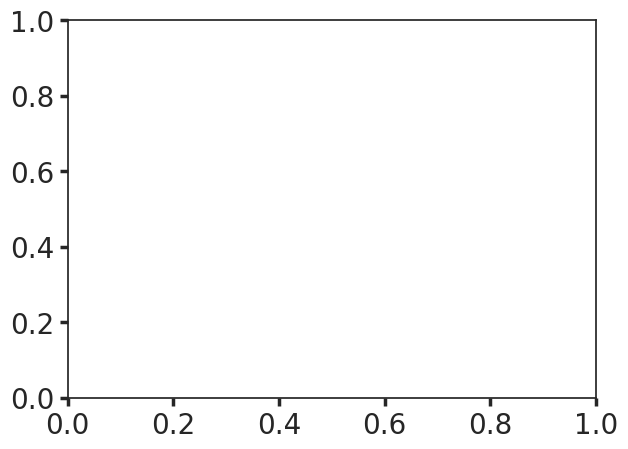

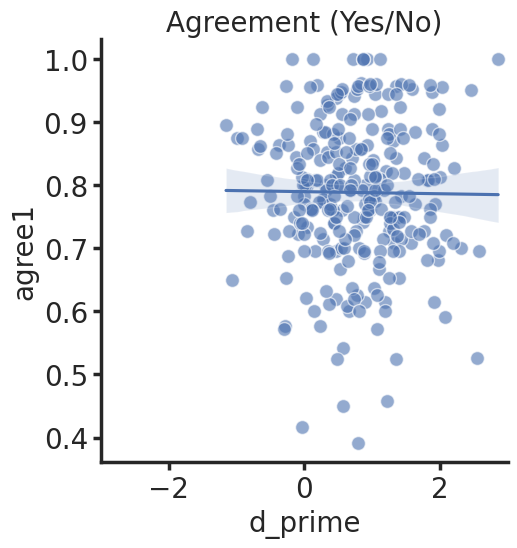

<AxesSubplot:>

(-3.0, 3.0)

Text(0.5, 1.0, 'Agreement (Justification)')

           n       r         CI95%  p-val   BF10  power
pearson  280 -0.0141  [-0.13, 0.1] 0.8141  0.077 0.0563
                            OLS Regression Results                            
Dep. Variable:                 agree2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.05541
Date:                Wed, 14 Jun 2023   Prob (F-statistic):              0.814
Time:                        16:32:45   Log-Likelihood:                 176.21
No. Observations:                 280   AIC:                            -348.4
Df Residuals:                     278   BIC:                            -341.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

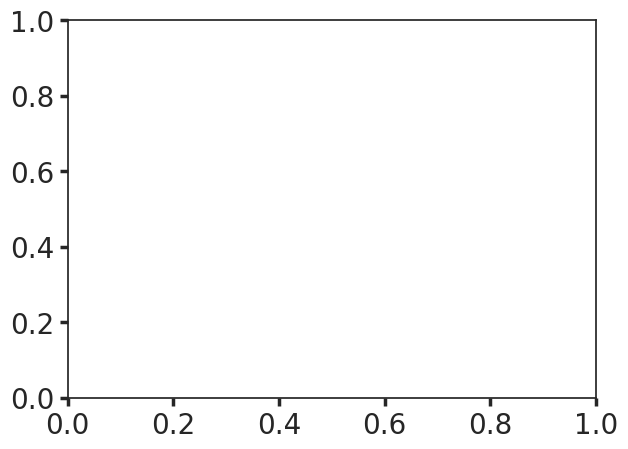

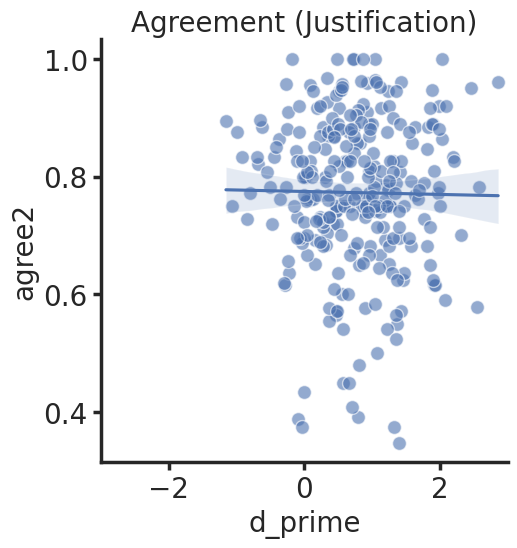

In [97]:
import scipy.stats as stats

sns.set(
    rc={'figure.figsize':(35,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

false = pd.DataFrame()
hits = pd.DataFrame()

df['correct'] = df.correct.astype(int)
df['agree1'] = df.agree1.astype(int)
df['agree2'] = df.agree2.astype(int)

labels = ['id', 'agree1', 'agree2']
labels = ['id']
titles = ['Agreement (Yes/No)', 'Agreement (Justification)']

false['id'] = 1 - df[(df.source == 'Human') & (df.q_id == 2)
                     ].groupby('prolific_id', as_index=False).mean().correct
false['engine'] = df[(df.source == 'Human') & (df.q_id == 2)].groupby(['prolific_id', 'engine'], as_index=False).mean().engine
false['prolific_id'] = df[(df.source == 'Human') & (df.q_id == 2)].groupby('prolific_id', as_index=False).mean().prolific_id

hits['id'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(
    'prolific_id', as_index=False).mean().correct
hits['engine'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(['prolific_id', 'engine'],as_index=False).mean().engine
hits['prolific_id'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby('prolific_id', as_index=False).mean().prolific_id

false['agree1'] = 1 - df[(df.source == 'Human') & (df.q_id == 2)
                         ].groupby('prolific_id', as_index=False).mean().agree1

hits['agree1'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(
    'prolific_id', as_index=False).mean().agree1
false['agree2'] = 1 - df[(df.source == 'Human') & (df.q_id == 2)
                         ].groupby('prolific_id', as_index=False).mean().agree2
hits['agree2'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(
    'prolific_id', as_index=False).mean().agree2

d = []
for i in range(false['id'].shape[0]):
    d.append({'agree1': hits['agree1'].values[i],
              'agree2': hits['agree2'].values[i],
              'engine': hits['engine'].values[i],
              'prolific_id': hits['prolific_id'].values[i],
              'd_prime': float(stats.norm.ppf(hits['id'].values[i]) - stats.norm.ppf(false['id'].values[i]))})

d = pd.DataFrame(d)  # plt.subplot(1, 4, 1)
d = d[~d.isin([np.nan, np.inf, -np.inf]).any(1)]

sns.set({'figure.figsize': (15,5), "figure.dpi": 100, 'legend.fontsize': 20,})
sns.set_style('ticks')
sns.barplot(x='engine', y='d_prime', data=d, ci=68, alpha=.5, errwidth=2.5, edgecolor='white', order=['dv2_humanized','dv2_prolific', 'dv2_ai', 'dv2', 'dv3'], zorder=0)
sns.stripplot(x='engine', y='d_prime', data=d, edgecolor='white', order=['dv2_humanized','dv2_prolific', 'dv2_ai', 'dv2', 'dv3'], zorder=1)
plt.xlabel('exp')
# plt.ylim(0,1.5)
plt.show()

count = 0
d['d_prime'] = d['d_prime'].astype(float)
d['agree1'] = d['agree1'].astype(float)
for agree in ('agree1', 'agree2'):
    count += 1
    # plt.clear()
    plt.subplot(1, 2, count)
    sns.lmplot(x='d_prime', y=agree, data=d, scatter_kws={
               'alpha': 0.6, 's': 100, 'edgecolor': 'white'})
# snspine(offset=10, trim=True)
    plt.gca().spines['left'].set_linewidth(2.5)
    plt.gca().spines['bottom'].set_linewidth(2.5)
    plt.xlim([-3, 3])
    plt.title(titles[count-1])
    print(pg.corr(d['d_prime'], d[agree]))
    print(sm.formula.ols(f'{agree} ~ d_prime', data=d).fit().summary())
    plt.show()

# add d_prime to the original dataframe to the corresponding prolific_id
def f(x):
    try:
        return d[d.prolific_id == x.prolific_id].d_prime.values[0]
    except:
        return np.NaN

# df['d_prime'] = df.apply(f, axis=1)
# for i in df.prolific_id.unique():
    # print(i)
    # assert d.prolific_id.isin([i]).any()

,d_prime,anti_AI_bias
d_prime,1.000000,-0.377711
anti_AI_bias,-0.377711,1.000000


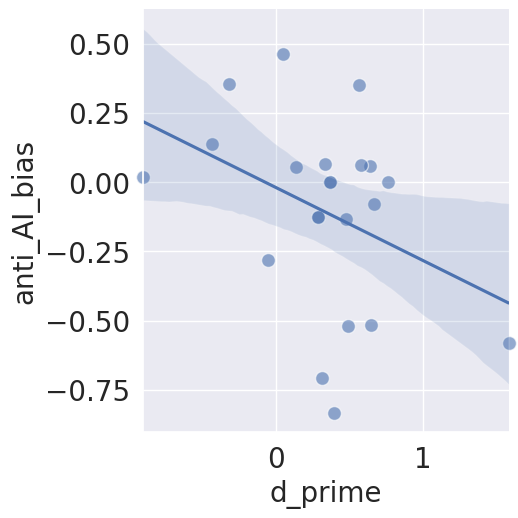

In [52]:
df2 = df[(df.source == 'Human') & (df.q_id == 2) & (df.engine=='dv2_humanized')].groupby(['prolific_id', 'correct'], as_index=False).mean()
new_df = []
for i in df2.prolific_id.unique():
    # new_df['antiAI'] =     print(i)
    # df2[(df2.correct == True) & (df2.prolific_id == i)]
    try:
        new_df.append({
            'd_prime': df2[df2.prolific_id == i].d_prime.values[0],
            'anti_AI_bias': df2[(df2.correct==False) & (df2.prolific_id==i)].agree2.values[0] - df2[(df2.correct == True) & (df2.prolific_id == i)].agree2.values[0]
        })
    except:
        continue

# sns.displot(antiAI)
new_df = pd.DataFrame(new_df)

sns.lmplot(x='d_prime', y='anti_AI_bias', data=new_df, scatter_kws=
           {'clip_on': False, 'alpha': 0.6, 's': 100, 'edgecolor': 'white'})
new_df.corr()

In [134]:
sns.set({'figure.figsize':(6,6), "figure.dpi": 100, 'legend.fontsize': 20,})
df['justif_len'] = df.a1.str.len()
dff = df[(df.q_id == 2) & (df.engine=='dv2')]
dff.loc[dff.answer=='AI', 'a'] = 1
dff.loc[dff.answer=='Human', 'a'] = 0
dff.loc[dff.agree1==True, 'agree1'] = 1
dff.loc[dff.agree1==False, 'agree1'] = 0

dff['agree1'] = dff['agree1'].astype(float)
print(sm.Logit.from_formula('agree1 ~ justif_len*correctness*correct', data=dff).fit().summary())
#sns.lmplot(x='justif_len', y='a', data=dff, logistic=True)
#plt.ylabel('ID Answer (AI=1, Human=0)')
#plt.xlabel('justification length')
#plt.annotate('***', xy=(0, 0), fontsize=20)

Optimization terminated successfully.
         Current function value: 0.498104
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 agree1   No. Observations:                 3542
Model:                          Logit   Df Residuals:                     3534
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 May 2023   Pseudo R-squ.:                 0.01573
Time:                        18:01:37   Log-Likelihood:                -1764.3
converged:                       True   LL-Null:                       -1792.5
Covariance Type:            nonrobust   LLR p-value:                 7.903e-10
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.9282   

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_1341153/297445386

<AxesSubplot:xlabel='source', ylabel='dataset_id'>

<AxesSubplot:xlabel='source', ylabel='dataset_id'>

Text(0, 0.5, 'N trials')

Text(0.5, 1.0, 'DV2 humanized')

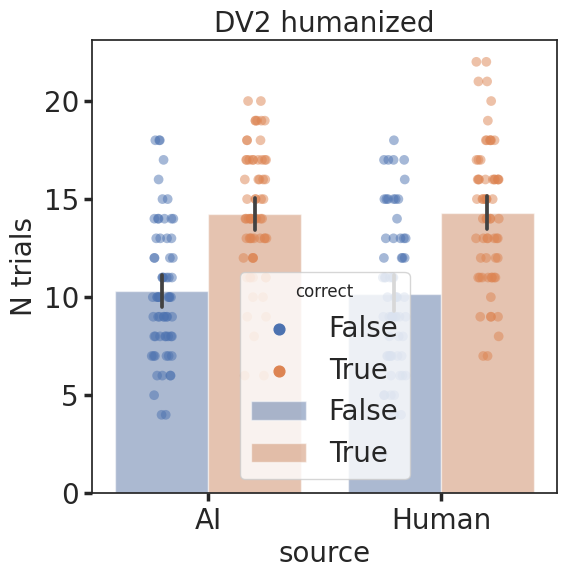

In [173]:
df2 = df[(df.engine=='dv2_ai') & (df.q_id==2)].groupby(['prolific_id', 'source', 'correct'], as_index=False).count()
sns.set({'figure.figsize':(6, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')


for engine in []:

    sns.barplot(x='source', y='dataset_id', data=df2, hue='correct', dodge=True, alpha=.5, zorder=0)
    sns.stripplot(x='source', y='dataset_id', data=df2, alpha=0.5, jitter=0.1, size=7, hue='correct', dodge=True, zorder=1)
    plt.ylabel('N trials')
    plt.title(engine)    
    plt.legend(title='Correct identification')

Size of dv2_ai dataset:  95.66666666666667


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dc1eea730>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

ANOVA: VAR=agree1, ENGINE=dv2_ai


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,source,0.0001,1,70,0.0001,0.0057,0.9398,0.9398,0.0000,1.0000
1,correct,0.0004,1,70,0.0004,0.0215,0.8838,0.8838,0.0000,1.0000
2,source * correct,0.1830,1,70,0.1830,4.3912,0.0397,0.0397,0.0227,1.0000


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 2 (Justification)')

([<matplotlib.axis.XTick at 0x7f6dc1eb13a0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

ANOVA: VAR=agree2, ENGINE=dv2_ai


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,source,0.0486,1,70,0.0486,2.3499,0.1298,0.1298,0.0045,1.0000
1,correct,0.0361,1,70,0.0361,1.8168,0.1820,0.1820,0.0034,1.0000
2,source * correct,0.2980,1,70,0.2980,4.2360,0.0433,0.0433,0.0271,1.0000


Text(0.5, 1.01, 'dv2_ai')

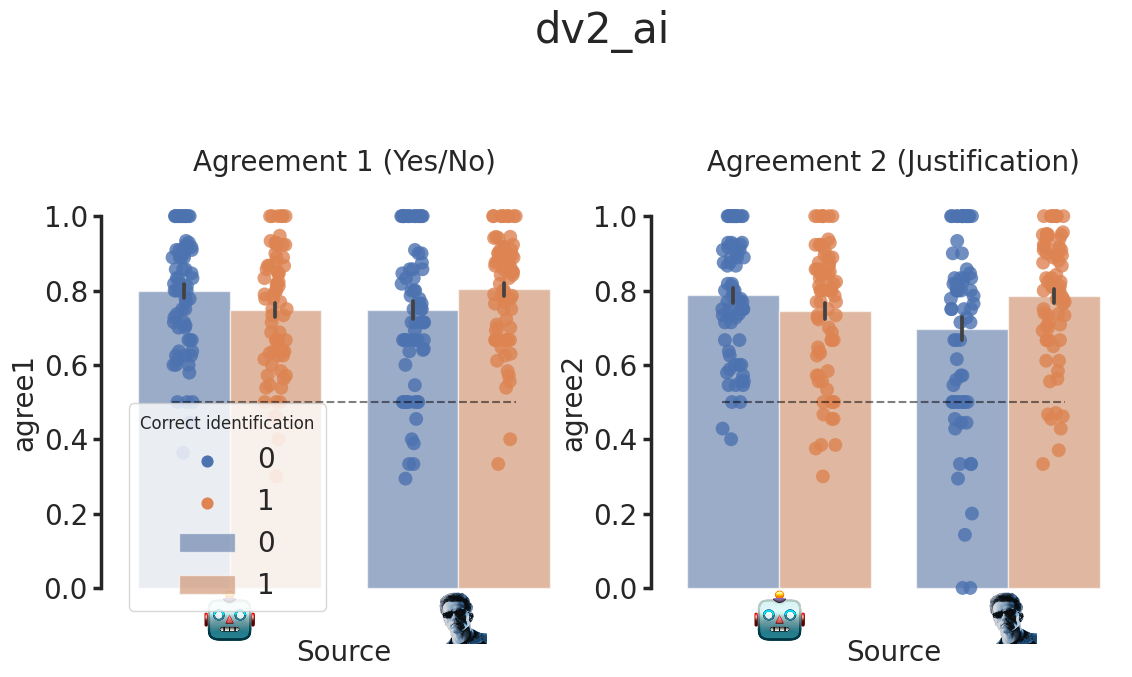

In [106]:

sns.set(
    rc={'figure.figsize':(13,13), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------
engine = 'dv2_ai'
# ids = np.random.choice(df[(df.engine==engine) & (df.q_id == 0) & (df.cond!='non_moral')].prolific_id.unique(), 22, replace=False)
avg = df[(df.engine==engine) & (df.q_id == 2)].groupby(['prolific_id', 'source', 'correct'], as_index=False).mean()
print(f'Size of {engine} dataset: ', avg.shape[0]/3)

plt.subplot(2, 2, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
sns.stripplot(x='source', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)

plt.xlabel('Source')
# plt.legend([], [], frameon=False)
print(f'ANOVA: VAR=agree1, ENGINE={engine}')
pg.rm_anova(data=avg, dv='agree1', within=['source', 'correct'], subject='prolific_id', detailed=True)
plt.legend(title='Correct identification')


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
plt.subplot(2, 2, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='source', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.legend([], [], frameon=False)
plt.xlabel('Source')
print(f'ANOVA: VAR=agree2, ENGINE={engine}')
pg.rm_anova(data=avg, dv='agree2', within=['source', 'correct'], subject='prolific_id', detailed=True, correction='auto')
plt.suptitle(engine, fontsize=30, y=1.01)

<AxesSubplot:>

Size of dv2 dataset:  101.0


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbee15e50>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv2')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.7221,214.0758,two-sided,0.0000,"[-0.22, -0.13]",0.8964,3.643e+10,1.0000


<AxesSubplot:>

Size of dv3 dataset:  96.33333333333333


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbedd1d30>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv3')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.9560,233.6013,two-sided,0.0001,"[-0.13, -0.04]",0.4743,194.272,0.9800


<AxesSubplot:>

Size of dv2_prolific dataset:  102.66666666666667


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbed39340>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv2_prolific')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.5289,193.8003,two-sided,0.0000,"[-0.26, -0.16]",0.9815,7.452e+12,1.0000


<AxesSubplot:>

Size of dv2_humanized dataset:  104.33333333333333


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbef2abe0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv2_humanized')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.6532,245.5859,two-sided,0.0003,"[-0.11, -0.03]",0.4150,66.766,0.9554


<AxesSubplot:>

Size of dv2_ai dataset:  95.66666666666667


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbf012c10>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv2_ai')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.6909,275.9183,two-sided,0.0076,"[-0.09, -0.01]",0.3179,3.972,0.7653


ANOVA: VAR=agree1, ENGINE=dv2


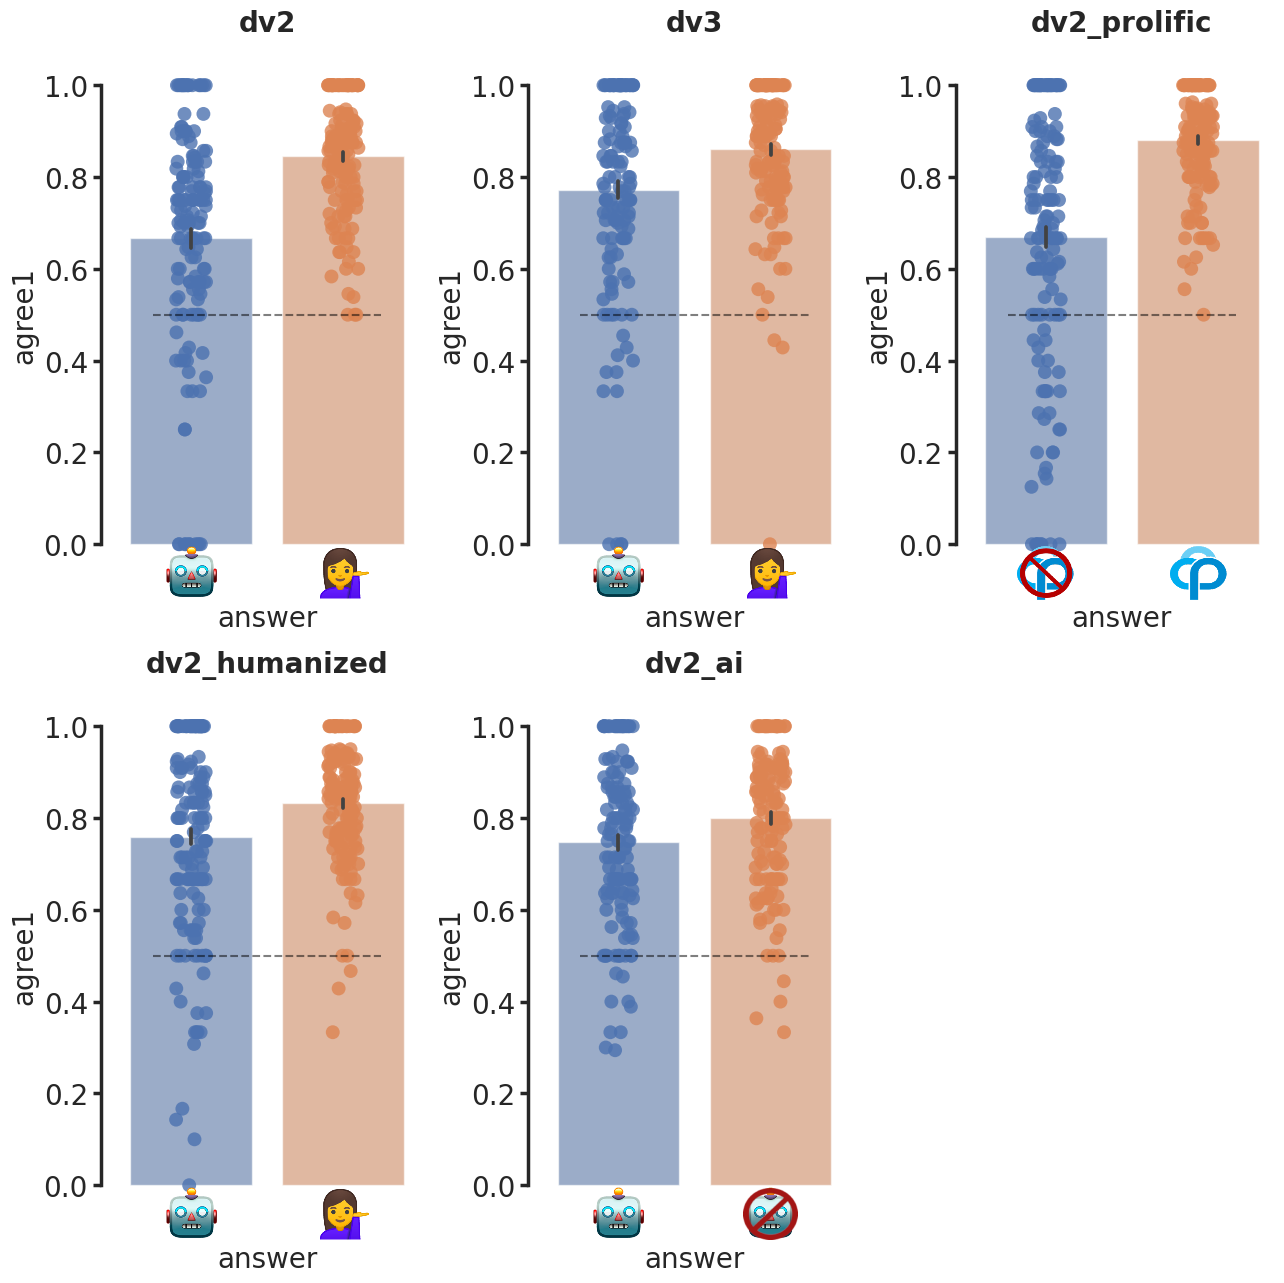

In [109]:
sns.set(
    rc={'figure.figsize':(13,13), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")


count = 0
for engine in ['dv2', 'dv3', 'dv2_prolific', 'dv2_humanized', 'dv2_ai']:
    count += 1
    plt.subplot(2, 3, count)
#
# ids = np.random.choice(df[(df.engine==engine) & (df.q_id == 0) & (df.cond!='non_moral')].prolific_id.unique(), 22, replace=False)
    avg = df[(df.engine==engine) & (df.q_id == 2)].groupby(['prolific_id', 'answer', 'correct'], as_index=False).mean()
    print(f'Size of {engine} dataset: ', avg.shape[0]/3)
    # print(avg.answer.unique())
    plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
    sns.barplot(x='answer', y='agree1', data=avg, ci=68, alpha=0.6, zorder=0, dodge=True)
    sns.stripplot(x='answer', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, zorder=1)
    plt.ylim(-.1, 1.1)
    plt.title('Agreement 1 (Yes/No)')
    plt.xticks(range(2), ('', ''))
    plt.xlabel('')
    plt.xticks([])
    for i, c in enumerate(avg.answer.unique()):
        offset_image(i, c, plt.gca(), size=0.3)
    sns.despine(offset=10, trim=True, bottom=True);
    plt.gca().spines['left'].set_linewidth(2.5)
    plt.gca().spines['bottom'].set_linewidth(2.5)

    plt.xlabel('answer')
    plt.title(engine, fontweight='bold')
    answers = avg.answer.unique()
    pg.ttest(avg[avg.answer==answers[0]].agree1, avg[avg.answer==answers[1]].agree1, paired=True)
plt.tight_layout()
# plt.legend([], [], frameon=False)
print('ANOVA: VAR=agree1, ENGINE=dv2')
# pg.rm_anova(data=avg, dv='agree1', within=['source', 'correct'], subject='prolific_id', detailed=True)

<AxesSubplot:>

Size of dv2 dataset:  101.0


<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbef30be0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv2')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.0967,262.8674,two-sided,0.2738,"[-0.02, 0.08]",0.1265,0.225,0.1952


<AxesSubplot:>

Size of dv3 dataset:  96.33333333333333


<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbefd8e20>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv3')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.4357,264.8011,two-sided,0.1523,"[-0.01, 0.08]",0.1702,0.345,0.3023


<AxesSubplot:>

Size of dv2_prolific dataset:  102.66666666666667


<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbef8f400>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv2_prolific')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.8883,303.7875,two-sided,0.3751,"[-0.08, 0.03]",0.1013,0.183,0.1437


<AxesSubplot:>

Size of dv2_ai dataset:  95.66666666666667


<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbf1185b0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv2_ai')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.1466,282.3996,two-sided,0.8835,"[-0.04, 0.04]",0.0173,0.131,0.0525


<AxesSubplot:>

Size of dv2_humanized dataset:  104.33333333333333


<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dbf155d30>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv2_humanized')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.3299,310.9997,two-sided,0.1845,"[-0.07, 0.01]",0.1503,0.29,0.2635


ANOVA: VAR=agree1, ENGINE=dv2


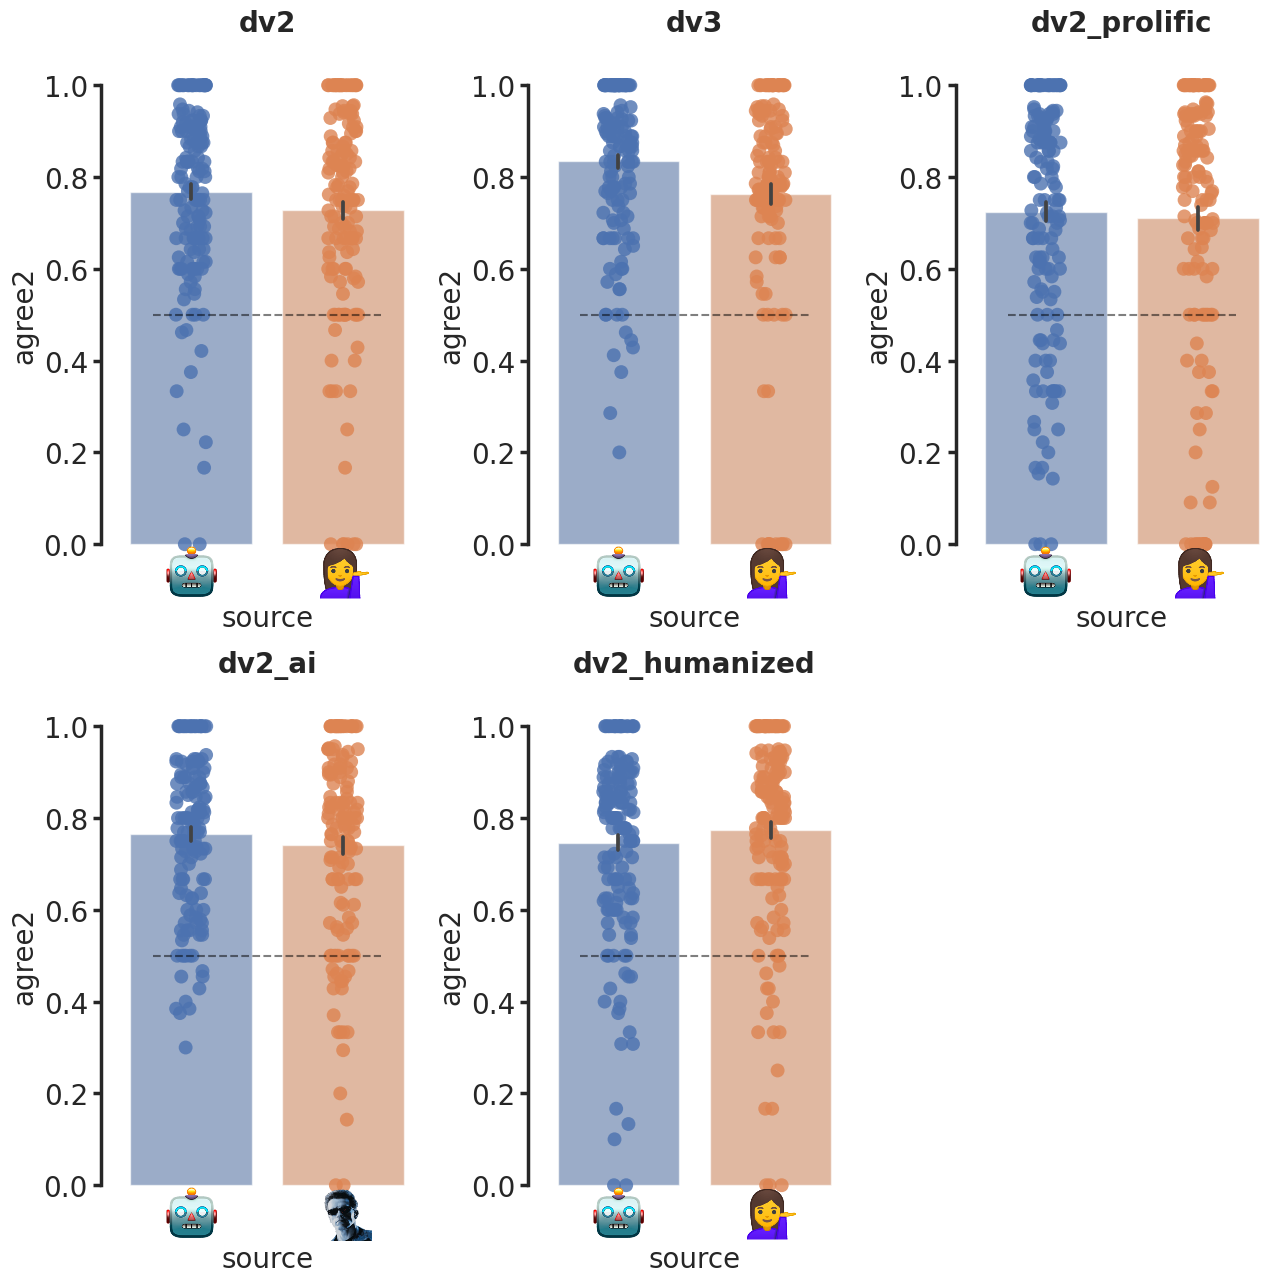

In [111]:
sns.set(
    rc={'figure.figsize':(13,13), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")


count = 0
for engine in ['dv2', 'dv3', 'dv2_prolific', 'dv2_ai', 'dv2_humanized']:
    count += 1
    plt.subplot(2, 3, count)
#
# ids = np.random.choice(df[(df.engine==engine) & (df.q_id == 0) & (df.cond!='non_moral')].prolific_id.unique(), 22, replace=False)
    avg = df[(df.engine==engine) & (df.q_id == 2)].groupby(['prolific_id', 'source', 'correct'], as_index=False).mean()
    print(f'Size of {engine} dataset: ', avg.shape[0]/3)
    # print(avg.answer.unique())
    plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
    sns.barplot(x='source', y='agree2', data=avg, ci=68, alpha=0.6, zorder=0, dodge=True)
    sns.stripplot(x='source', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, zorder=1)
    plt.ylim(-.1, 1.1)
    plt.title('Agreement 1 (Yes/No)')
    plt.xticks(range(2), ('', ''))
    plt.xlabel('')
    plt.xticks([])
    for i, c in enumerate(avg.source.unique()):
        offset_image(i, c, plt.gca(), size=0.3)
    sns.despine(offset=10, trim=True, bottom=True);
    plt.gca().spines['left'].set_linewidth(2.5)
    plt.gca().spines['bottom'].set_linewidth(2.5)

    plt.xlabel('source')
    plt.title(engine, fontweight='bold')
    source = avg.source.unique()
    pg.ttest(avg[avg.source==source[0]].agree1, avg[avg.source==source[1]].agree1, paired=True)
plt.tight_layout()
# plt.legend([], [], frameon=False)
print('ANOVA: VAR=agree1, ENGINE=dv2')
#

<AxesSubplot:>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f6dc2fa49a0>,
 [Text(0, 0, ''), Text(1, 0, '')])

([], [])

<AxesSubplot:>

<AxesSubplot:xlabel='answer', ylabel='agree2'>

<AxesSubplot:xlabel='answer', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 2 (Justification)')

([<matplotlib.axis.XTick at 0x7f6dc3ec1250>,
 [Text(0, 0, ''), Text(1, 0, '')])

([], [])

Text(0.5, 0.98, 'dv2')

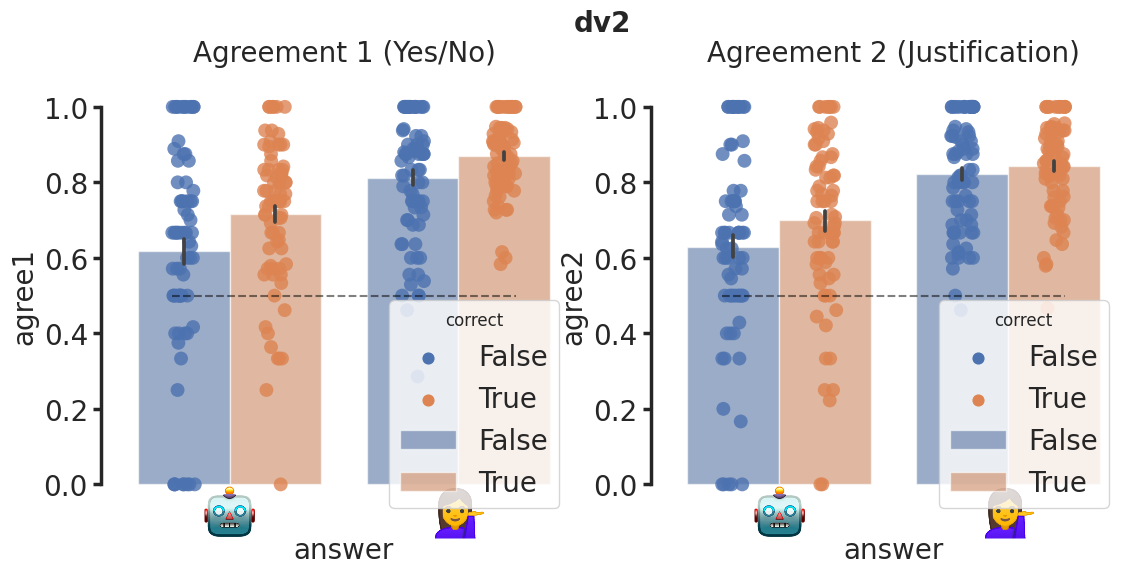

In [65]:
sns.set(
    rc={'figure.figsize':(13,6), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})

# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and answer + anova
# -------------------------------------------------------------------------------


#plt.subplot(1, 3, 1)
#plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## raincloud(x='answer', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
#sns.barplot(x='answer', y='correct', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
#sns.stripplot(x='answer', y='correct', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
#plt.ylim(-.1, 1.1)
#plt.title('Correct identification')
#plt.xticks(range(2), ('', ''))
#plt.xlabel('id choice')
#plt.xticks([])
#for i, c in enumerate(avg.answer.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);
#plt.gca().spines['left'].set_linewidth(2.5)
#plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
# print(pg.mixed_anova(data=avg, dv='correct', within='answer', between='correct', subject='prolific_id'))



# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and answer + anova
# -------------------------------------------------------------------------------
engine = 'dv2'
avg = df[(df.engine==engine) & (df.q_id==2)].groupby(['prolific_id', 'answer', 'correct'], as_index=False).mean()

plt.subplot(1, 2, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='answer', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='answer', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
sns.stripplot(x='answer', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))

# plt.xlabel('id choice')
plt.xticks([])
for i, c in enumerate(avg.answer.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
# print(pg.mixed_anova(data=avg, dv='agree1', within='answer', between='correct', subject='prolific_id'))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and answer + anova
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='answer', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='answer', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='answer', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
# plt.xlabel('')
plt.xticks([])

# plt.xlabel('id choice')
for i, c in enumerate(avg.answer.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.suptitle(engine, fontweight='bold', fontsize=20)
# plt.legend([], [], frameon=False)
# print(pg.rm_anova(data=avg, dv='agree2', within=['answer', 'correct'], subject='prolific_id', detailed=True))




In [ ]:
df.groupby(['prolific_id', 'source', 'correct'], as_index=False).size()


,prolific_id,source,correct,size
0,542460e3fdf99b691e6ac927,AI,True,51
1,542460e3fdf99b691e6ac927,Human,False,36
2,542460e3fdf99b691e6ac927,Human,True,48
3,5483702ffdf99b24c654b810,AI,False,45
4,5483702ffdf99b24c654b810,AI,True,21
...,...,...,...,...
659,63ea61d8106e3e2dc14c4cc7,Human,True,69
660,63ea627512244090788d46ec,AI,False,12
661,63ea627512244090788d46ec,AI,True,48
662,63ea627512244090788d46ec,Human,False,3


  Source        SS   DF        MS         F     p-unc       ng2       eps
0   cond  0.340806    2  0.170403  7.192593  0.000872  0.024048  0.970557
1  Error  8.055105  340  0.023691       NaN       NaN       NaN       NaN
  Source        SS   DF        MS          F         p-unc     p-GG-corr  \
0   cond  2.099979    2  1.049989  51.383346  3.174503e-20  2.747741e-18   
1  Error  6.947706  340  0.020434        NaN           NaN           NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.148092  0.890238      False  0.876705  0.000015  
1       NaN       NaN        NaN       NaN       NaN  


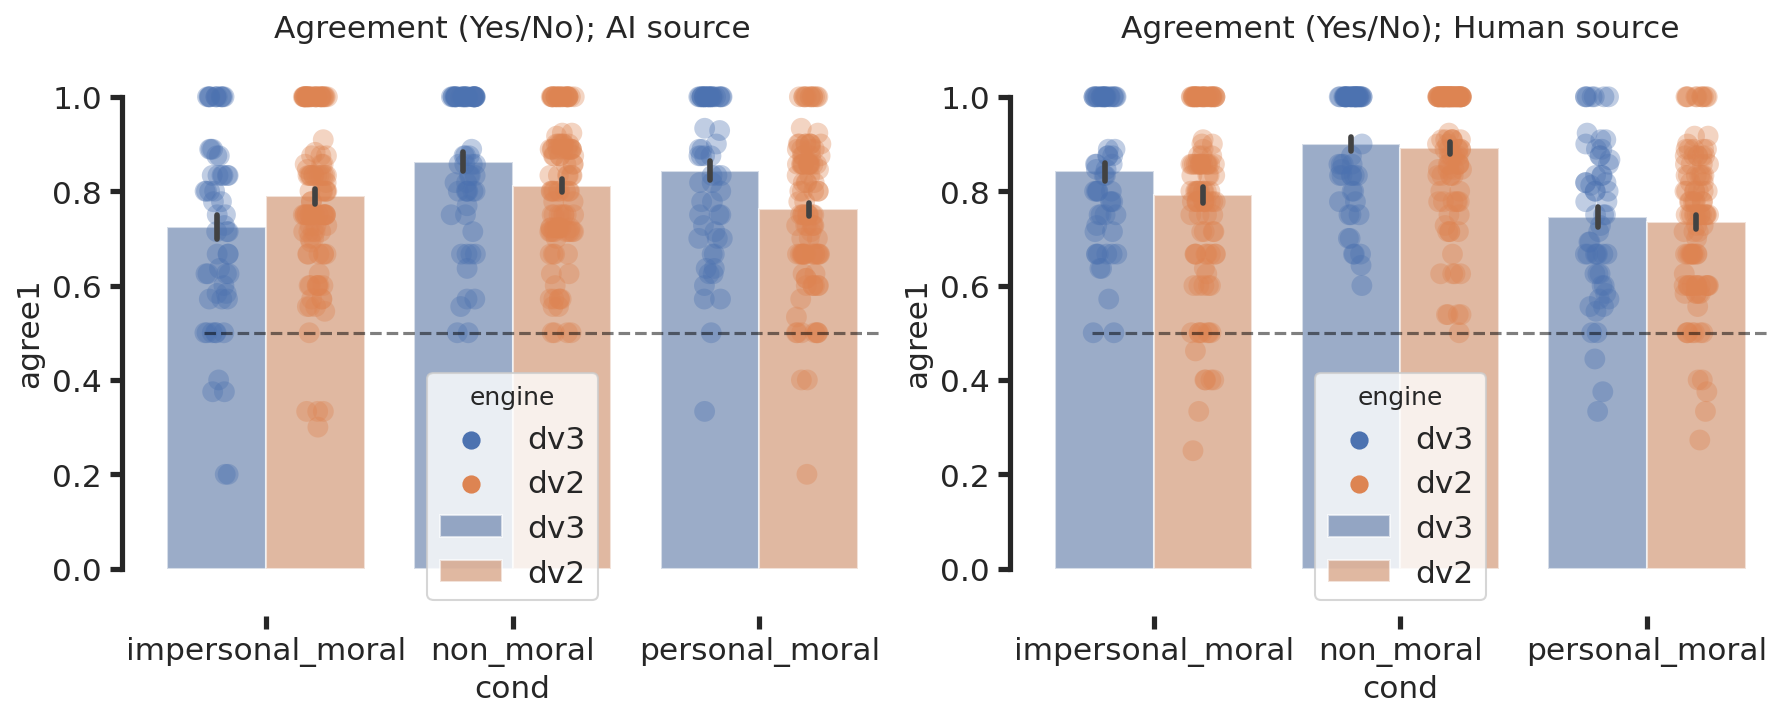

In [ ]:
sns.set(
    rc={'figure.figsize':(14,5), "figure.dpi": 150, 'legend.fontsize': 15, 'axes.labelsize': 15, 'axes.titlesize': 15,
      'xtick.labelsize': 15, 'ytick.labelsize': 15, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------

avg = df[df.source=='AI'].groupby(['prolific_id', 'cond', 'engine'], as_index=False).mean()
plt.subplot(1, 2, 1)
# avg = df.groupby(['prolific_id', 'cond', 'agree1'], as_index=False).mean()
plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='cond', y='agree1', hue='engine',data=avg, ci=68, alpha=0.6)
sns.stripplot(x='cond', y='agree1', data=avg, hue='engine', alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Yes/No); AI source')
# plt.xticks(range(2), ('', ''))
# plt.xlabel('')
# plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree1', within='cond', subject='prolific_id', detailed=True))


#plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
#sns.barplot(x='cond', y='correct', data=avg, ci=68, alpha=0.6)
#sns.stripplot(x='cond', y='correct', data=avg, alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
#plt.ylim(-.1, 1.1)
#plt.title('Accuracy Turing')
#plt.xticks(range(2), ('', ''))
#plt.xlabel('')
#plt.xticks([])
## for i, c in enumerate(avg.source.unique()):
#    # offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);
#plt.gca().spines['left'].set_linewidth(2.5)
#plt.gca().spines['bottom'].set_linewidth(2.5)
#plt.legend([], [], frameon=False)
#print(pg.rm_anova(data=avg, dv='correct', within='cond', subject='prolific_id', detailed=True))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
#
avg = df[df.source=='Human'].groupby(['prolific_id', 'cond', 'engine'], as_index=False).mean()
plt.subplot(1, 2, 2)
# avg = df.groupby(['prolific_id', 'cond', 'agree1'], as_index=False).mean()
plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='cond', y='agree1', hue='engine',data=avg, ci=68, alpha=0.6)
sns.stripplot(x='cond', y='agree1', data=avg, hue='engine', alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Yes/No); Human source')
# plt.xticks(range(2), ('', ''))
# plt.xlabel('')
# plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree1', within='cond', subject='prolific_id', detailed=True))
